In [111]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv("../data/dataset1.csv")
df = df.drop("id", axis=1)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
mean = np.mean(df, axis=0)
for i in range(1, df.shape[1]):
    df.iloc[:, i].fillna(mean[i - 1], inplace=True)

In [113]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)
mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
X = (X - mean) / stddev
df = pd.concat([X, y], axis=1)

In [114]:
X = df.drop(["diagnosis"], axis=1)
split_idx = int(len(df) * 0.67)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [115]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.095642,-2.073335,1.264830,0.984375,1.568466,3.283515,2.652742,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,1.998726,1.307686,2.616665,2.109368,2.296076,2.750622,1.937015
1,1.820818,-0.353632,1.678196,1.908708,-0.826962,-0.487072,-0.025779,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.888300,-0.375612,-0.430444,-0.147944,1.087084,-0.243890,0.281190
2,1.573471,0.456187,1.559507,1.558884,0.942210,1.052926,1.362479,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.455364,0.527407,1.082932,0.854239,1.955000,1.152255,0.201391
3,-0.751027,0.253732,-0.585900,-0.764464,3.283553,3.402909,1.915269,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.545081,3.394275,3.893397,1.989374,2.175786,6.046041,4.935010
4,1.742116,-1.151816,1.768236,1.826229,0.280372,0.539340,1.370017,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220492,0.220556,-0.313395,0.612333,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,-0.989941,0.216499,-0.889989,-0.900412,-0.400681,1.168530,1.746919,0.270601,1.374147,3.076540,...,-1.122220,-0.465281,-0.915951,-0.923331,-0.792053,0.684709,1.586677,0.485634,-0.491410,1.997972
377,-0.177632,2.075826,-0.245794,-0.263902,-1.508016,-1.081769,-0.957859,-0.973701,-1.426127,-0.732562,...,-0.327023,1.620748,-0.302362,-0.347193,-0.945479,-0.690625,-0.926748,-0.864813,-0.334485,-0.739015
378,-0.121417,-0.963324,-0.148388,-0.211286,-0.973563,-0.546958,-0.583720,-0.624450,-0.071627,-0.542604,...,-0.358085,-0.983124,-0.277044,-0.388558,-0.213419,0.357097,-0.074508,-0.140179,0.786637,0.689050
379,-0.846592,-0.106963,-0.761068,-0.834144,1.796196,2.104733,1.004421,0.380483,1.403355,2.367738,...,-0.627292,1.163157,-0.461717,-0.649547,3.771263,4.348873,2.725172,2.098130,2.027474,3.122913


In [116]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [117]:
#Gradient Descent Implementation:

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.random_state = random_state
        self.threshold=threshold
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []
        
        # set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # gradient descent
        for i in range(self.n_iters):
            # calculate predicted probabilities and gradients
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples
            
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > self.threshold else 0 for i in y_pred]
        return y_pred_class
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(np.arange(1, len(self.costs)+1), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Gradient Descent Cost Graph')
        plt.show()
        fig.savefig('normalizedLR_graphs/'+"GD"+str(len(str(self.learning_rate)))+str(self.threshold)[-1]+".png")

In [118]:
#SGD implementation

import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=1, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.random_state = random_state
        self.threshold=threshold
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.costs = []
        
        # set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # stochastic gradient descent
        for i in range(self.n_iters):
            # shuffle data
            idx = np.arange(n_samples)
            np.random.shuffle(idx)
            X_shuffled = X[idx]
            y_shuffled = y[idx]
            
            # loop over batches
            for j in range(0, n_samples, self.batch_size):
                # get mini-batch
                X_batch = X_shuffled[j:j+self.batch_size]
                y_batch = y_shuffled[j:j+self.batch_size]
                
                # calculate predicted probabilities and gradients
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.sigmoid(linear_model)
                dw = np.dot(X_batch.T, (y_pred - y_batch)) / self.batch_size
                db = np.sum(y_pred - y_batch) / self.batch_size
                
                # update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred
    
    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        y_pred_class = [1 if i > self.threshold else 0 for i in y_pred_proba]
        return y_pred_class
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(np.arange(1, len(self.costs)+1), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Stochastic Gradient Descent Cost Graph')
        plt.show()
        fig.savefig('normalizedLR_graphs/'+"SGD"+str(len(str(self.learning_rate)))+str(self.threshold)[-1]+".png")

In [119]:
import numpy as np

class LogisticRegressionMiniBatchGD:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=32, random_state=None,threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.random_state = random_state
        self.threshold=threshold
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # initialize weights and bias to zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # initialize costs list for storing costs at each iteration
        self.costs = []
        
        # set random seed for reproducibility
        n_samples, n_features = X.shape
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        # minibatch gradient descent
        for i in range(self.n_iters):
            # shuffle data
            idx = np.arange(X.shape[0])
            np.random.shuffle(idx)
            X = X[idx]
            y = y[idx]
            
            # loop over batches
            for j in range(0, X.shape[0], self.batch_size):
                # get minibatch
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]
                
                # calculate predicted probabilities and gradients
                y_pred = self.sigmoid(np.dot(X_batch, self.weights) + self.bias)
                dw = np.dot(X_batch.T, (y_pred - y_batch)) / self.batch_size
                db = np.sum(y_pred - y_batch) / self.batch_size
                
                # update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            # calculate cost and add to list for graphing
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            y_pred[y_pred == 0] = 1e-15  # add small constant value to avoid NaN in cost
            y_pred[y_pred == 1] = 1 - 1e-15  # add small constant value to avoid NaN in cost
            cost = -1/n_samples * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            self.costs.append(cost)
            
        return self
        
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        return np.where(self.predict_proba(X) > self.threshold, 1, 0)
    
    def plot_cost(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plt.plot(range(1, len(self.costs) + 1), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Logistic Regression Cost Graph')
        plt.show()
        fig.savefig('normalizedLR_graphs/'+"minibatchGD"+str(len(str(self.learning_rate)))+str(self.threshold)[-1]+".png")

Accuracy: 0.9787234042553191


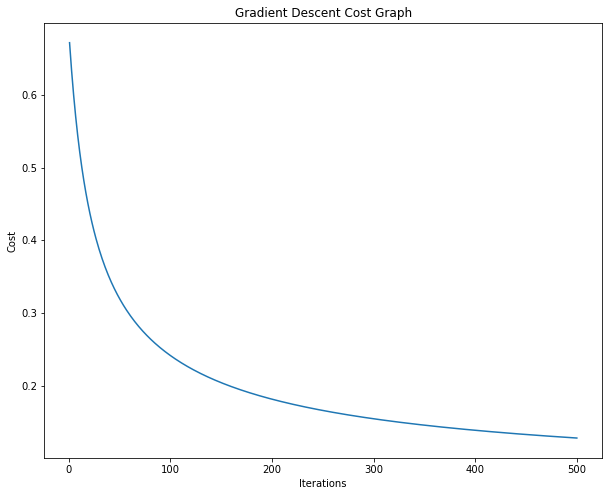

In [120]:
##With gradient descent and threshold as 0.5 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9574468085106383


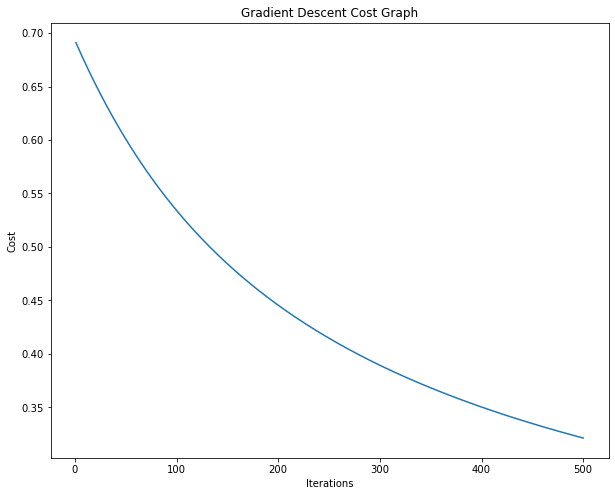

In [121]:
##With gradient descent and threshold as 0.5 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()


Accuracy: 0.9414893617021277


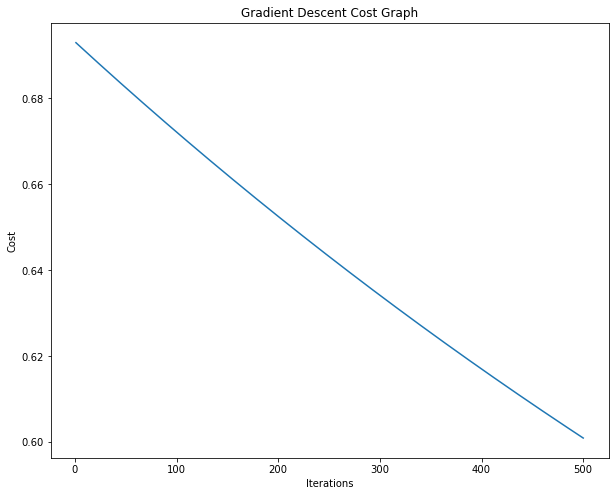

In [122]:
##With gradient descent and threshold as 0.5 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8829787234042553


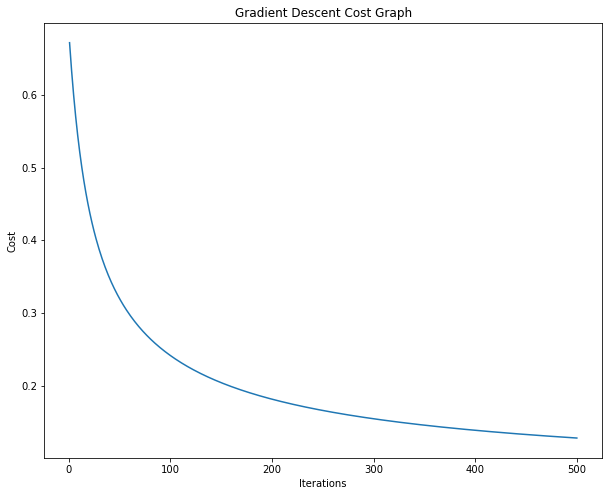

In [123]:
##With gradient descent and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.6223404255319149


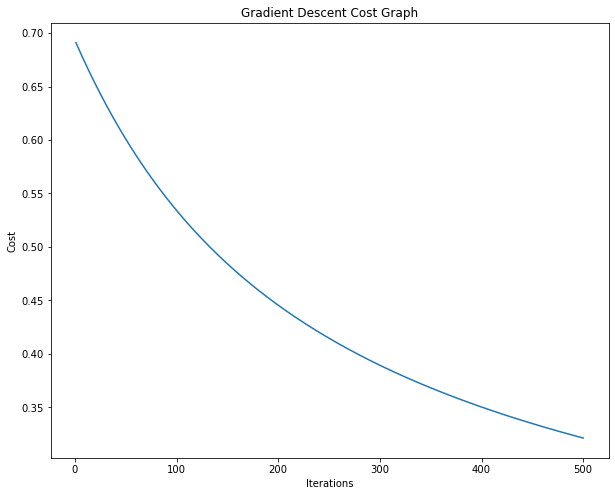

In [124]:
##With gradient descent and threshold as 0.3 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.22872340425531915


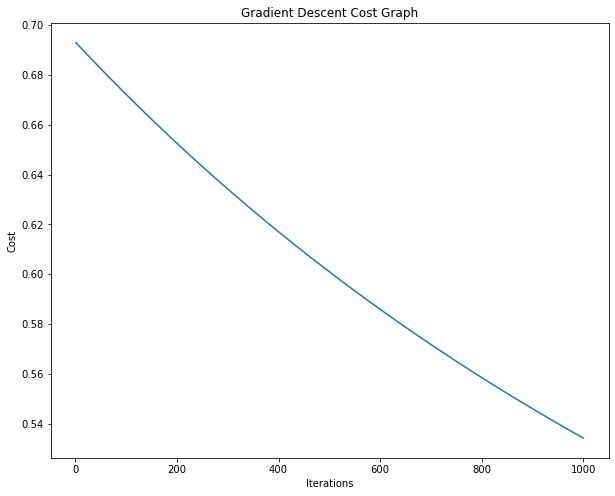

In [125]:
##With gradient descent and threshold as 0.3 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9521276595744681


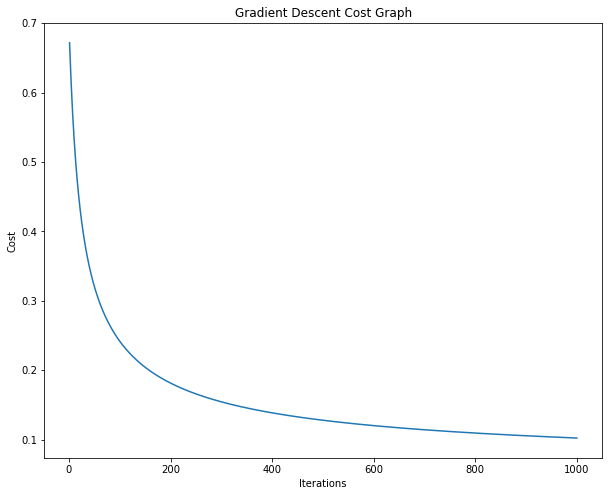

In [126]:
##With gradient descent and threshold as 0.4 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.898936170212766


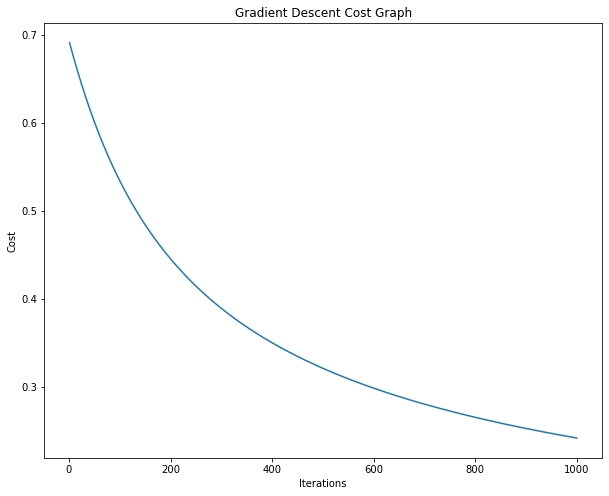

In [127]:
##With gradient descent and threshold as 0.4 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=1000,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.3723404255319149


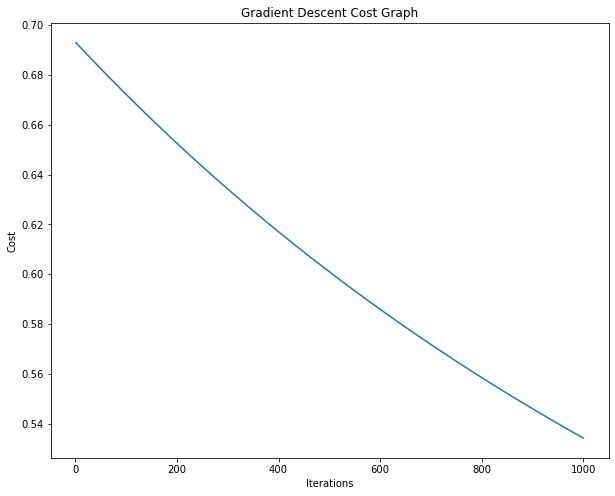

In [128]:
##With gradient descent and threshold as 0.4 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9787234042553191


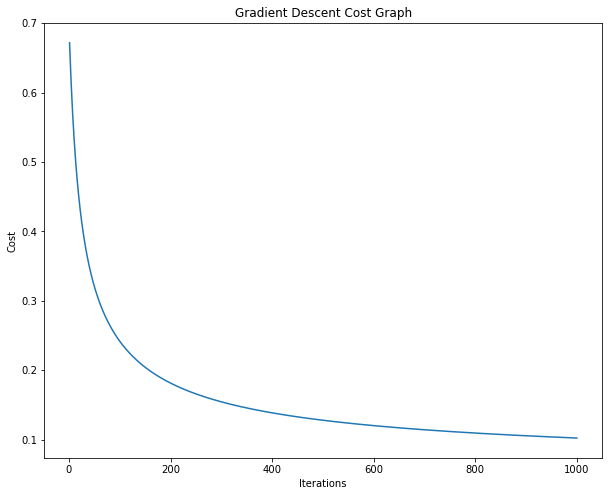

In [129]:
##With gradient descent and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9680851063829787


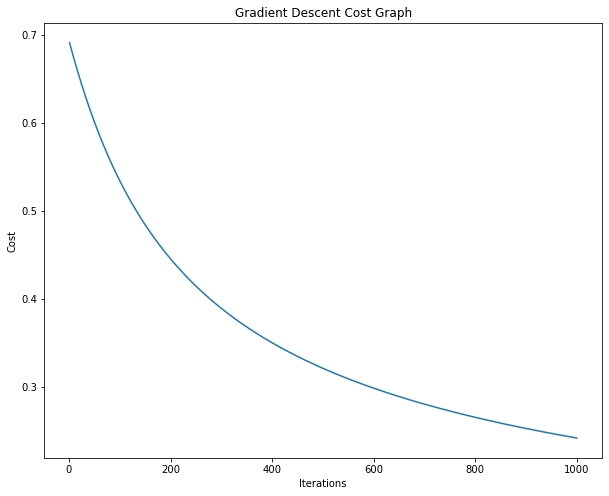

In [130]:
##With gradient descent and threshold as 0.6 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=1000,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9095744680851063


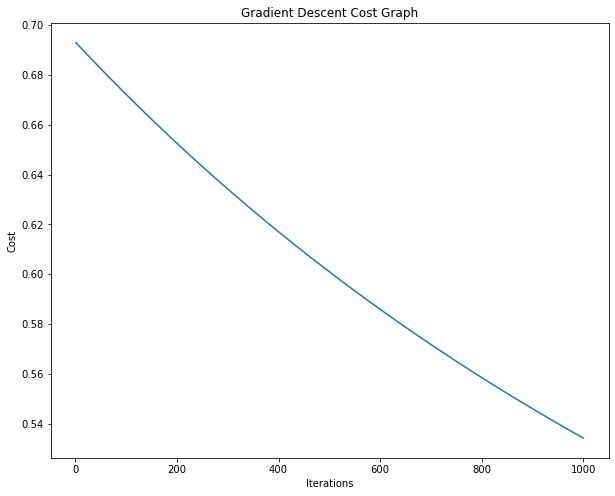

In [131]:
##With gradient descent and threshold as 0.6 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.973404255319149


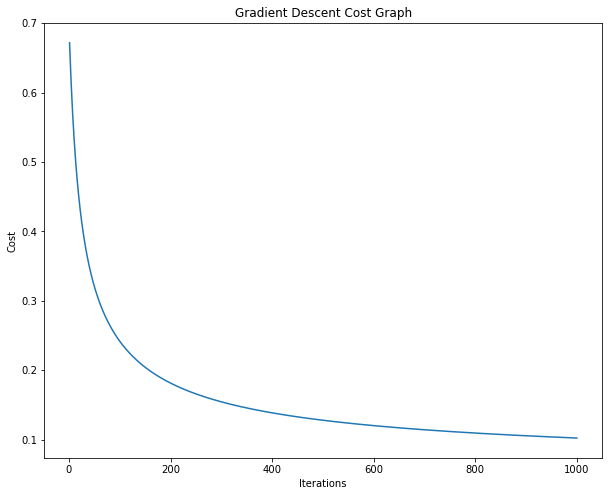

In [132]:
##With gradient descent and threshold as 0.7 and learning reate=0.01
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9680851063829787


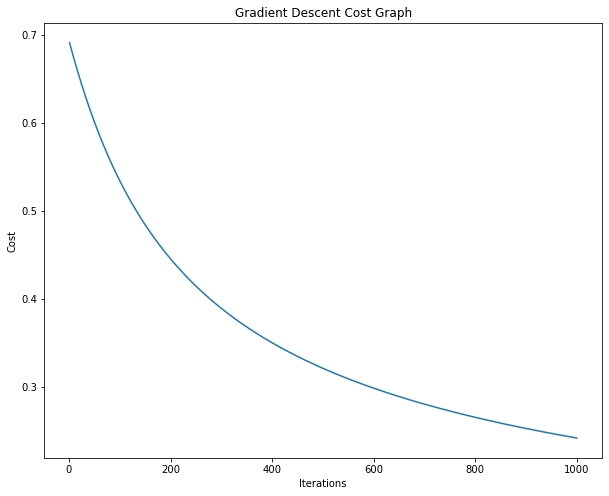

In [133]:
##With gradient descent and threshold as 0.7 and learning reate=0.001
model = LogisticRegressionGD(learning_rate=0.001, n_iters=1000,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8031914893617021


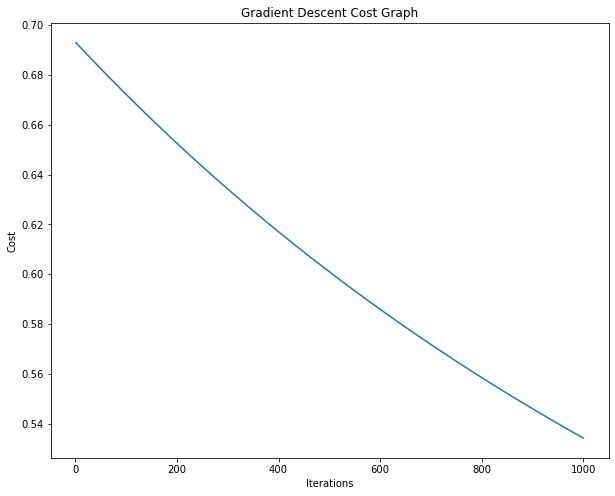

In [134]:
##With gradient descent and threshold as 0.7 and learning reate=0.0001
model = LogisticRegressionGD(learning_rate=0.0001, n_iters=1000,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.973404255319149


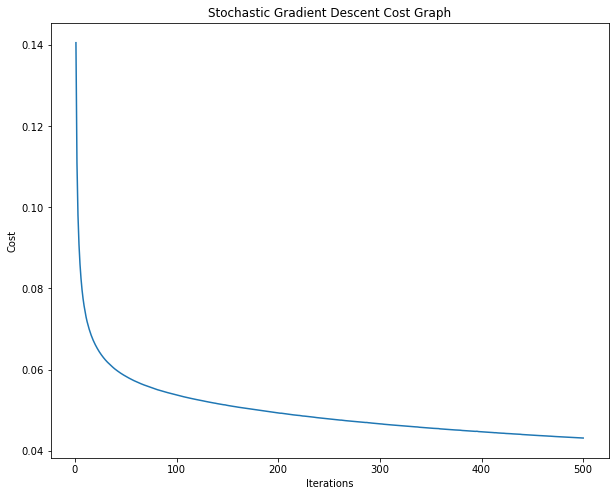

In [135]:
#With SGD and threshold as 0.5 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9680851063829787


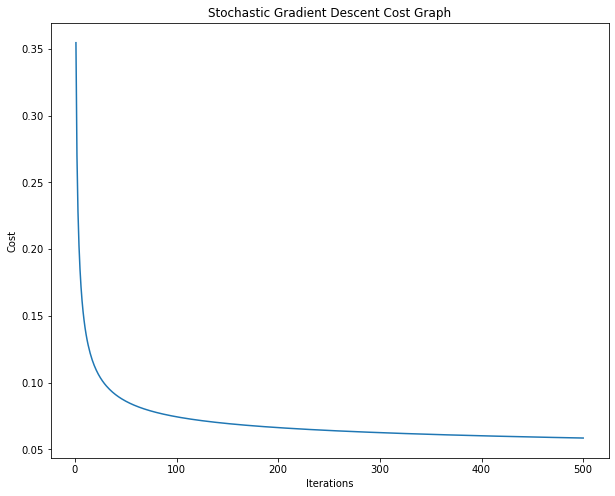

In [136]:
#With SGD and threshold as 0.5 and learning reate=0.001
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9840425531914894


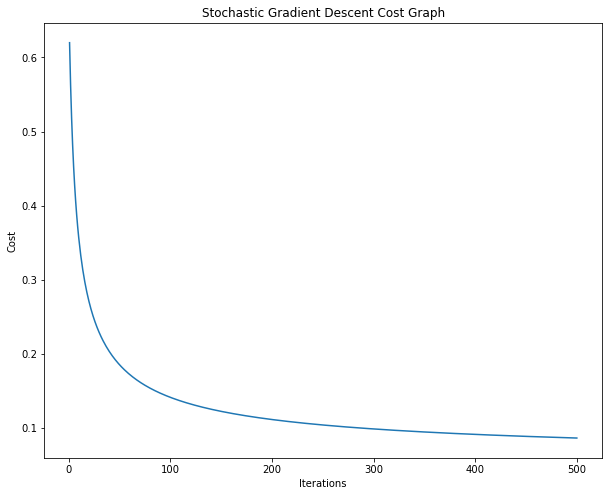

In [137]:
#With SGD and threshold as 0.5 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9627659574468085


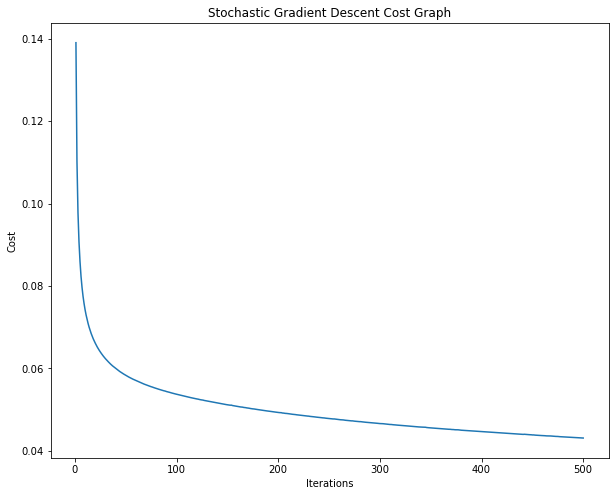

In [138]:
#With SGD and threshold as 0.4 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9627659574468085


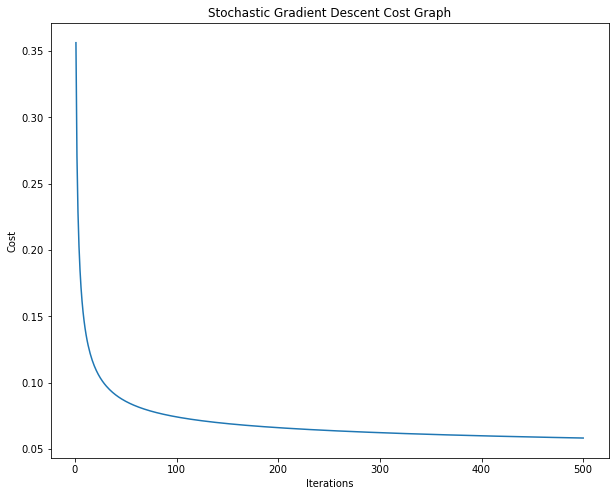

In [139]:
#With SGD and threshold as 0.4 and learning reate=0.001
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9627659574468085


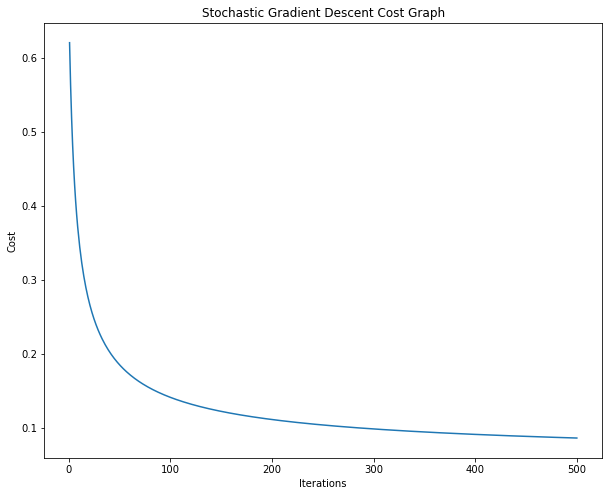

In [140]:
#With SGD and threshold as 0.4 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.973404255319149


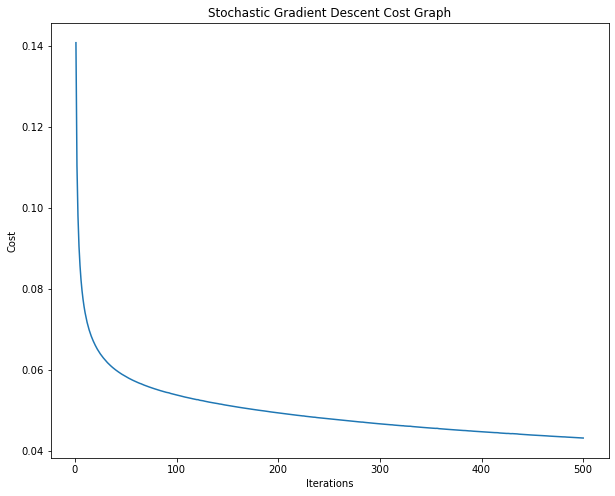

In [141]:
#With SGD and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9840425531914894


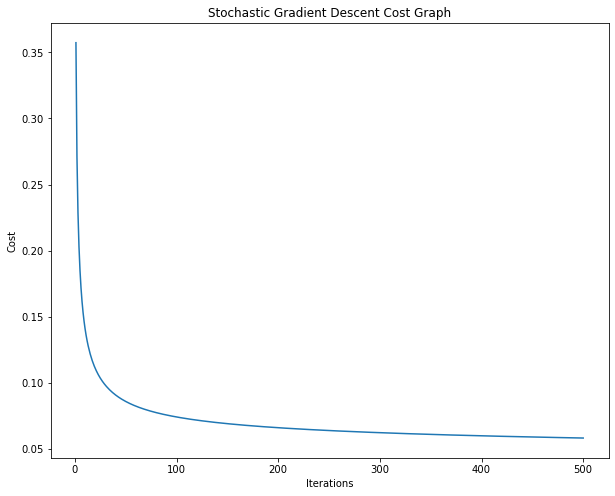

In [142]:
#With SGD and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9840425531914894


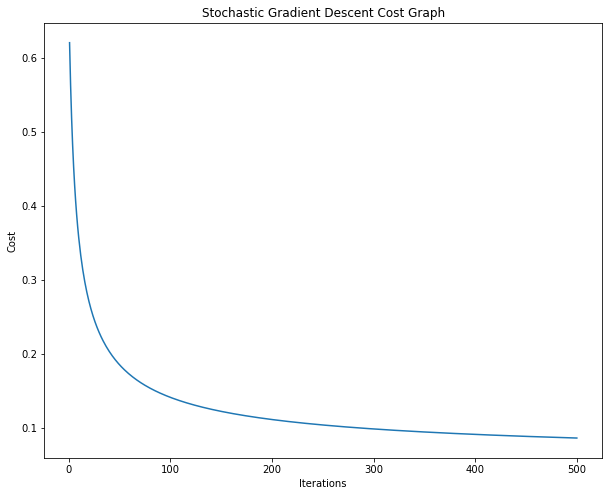

In [143]:
#With SGD and threshold as 0.6 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.973404255319149


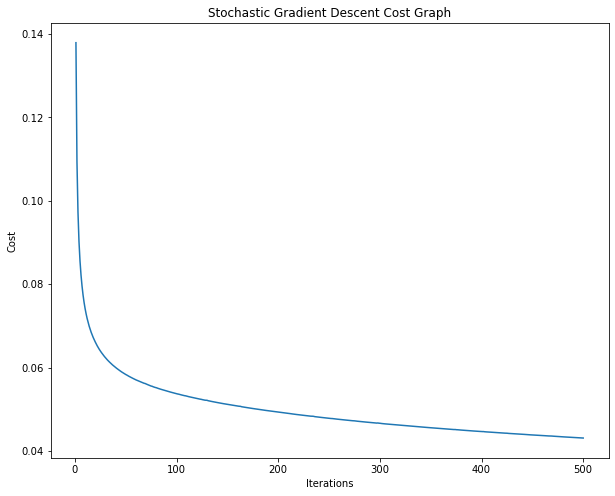

In [144]:
#With SGD and threshold as 0.7 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9787234042553191


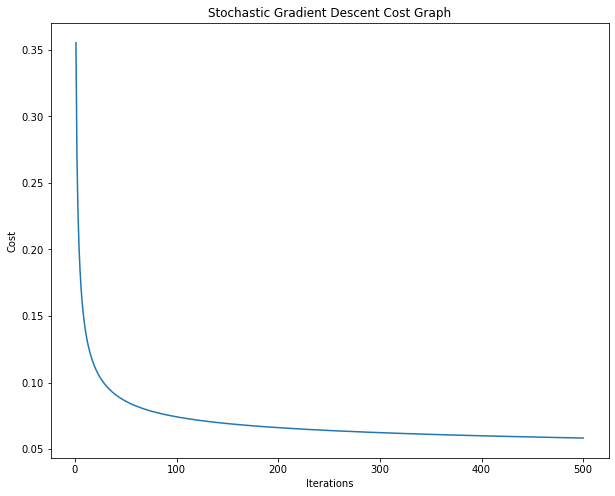

In [145]:
#With SGD and threshold as 0.7 and learning reate=0.001
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9787234042553191


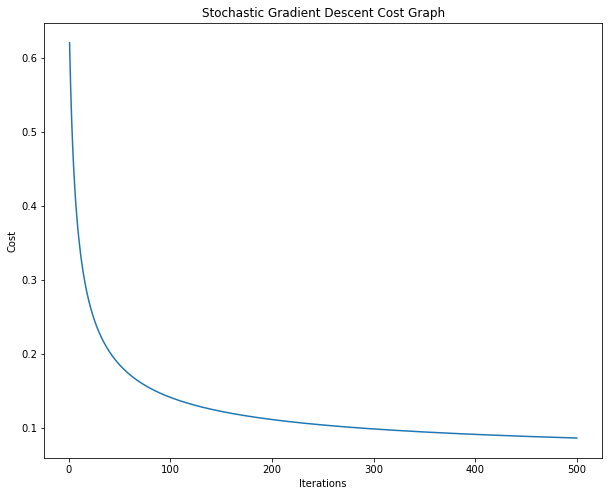

In [146]:
#With SGD and threshold as 0.7 and learning reate=0.0001
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9574468085106383


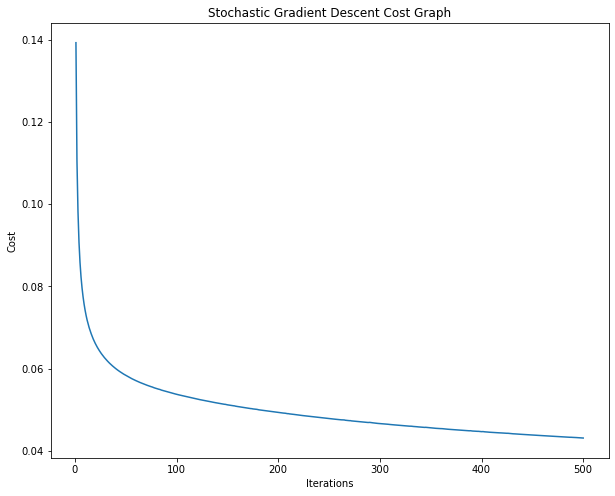

In [147]:
#With SGD and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.01, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9521276595744681


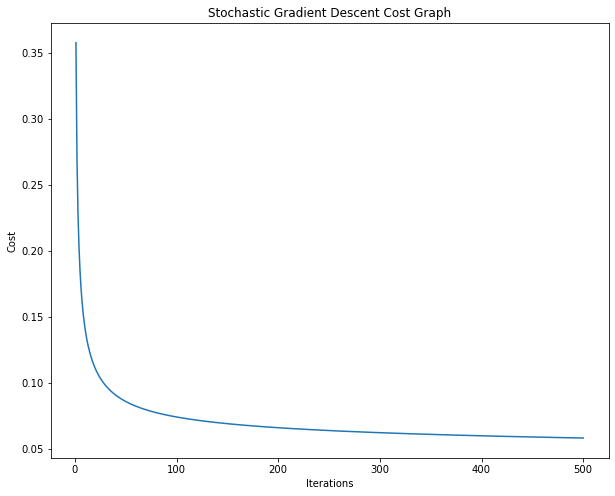

In [148]:
#With SGD and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9308510638297872


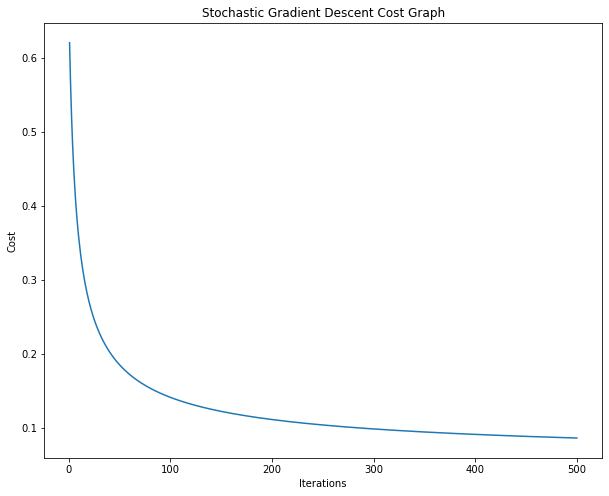

In [149]:
#With SGD and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionSGD(learning_rate=0.0001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9787234042553191


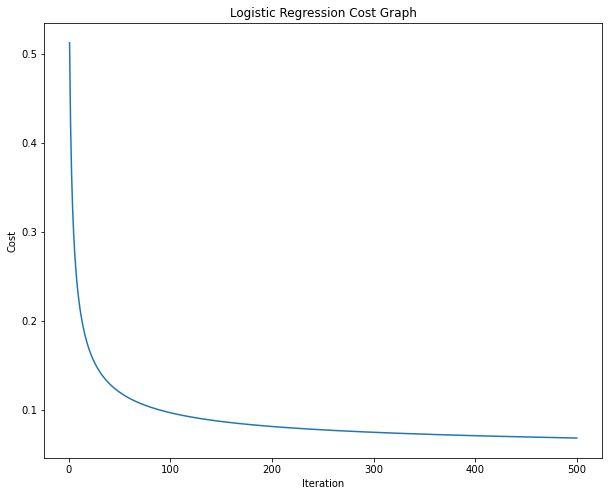

In [150]:
##With gradient descent and threshold as 0.5 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9893617021276596


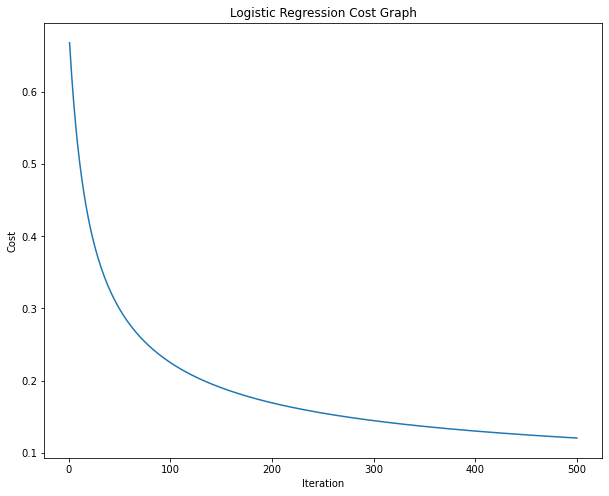

In [151]:
##With gradient descent and threshold as 0.5 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9574468085106383


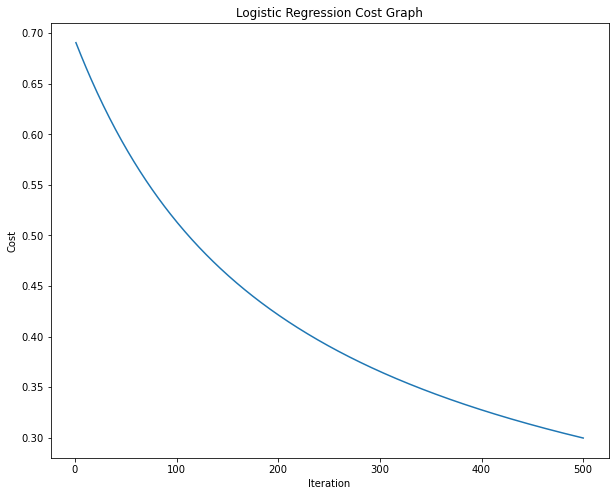

In [152]:
##With gradient descent and threshold as 0.5 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9840425531914894


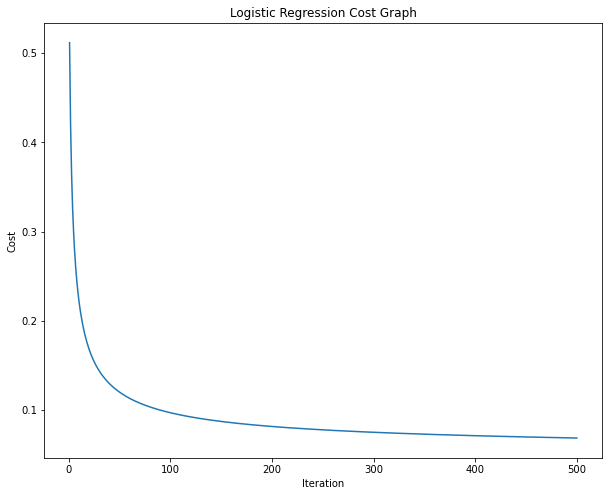

In [153]:
##With gradient descent and threshold as 0.6 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9787234042553191


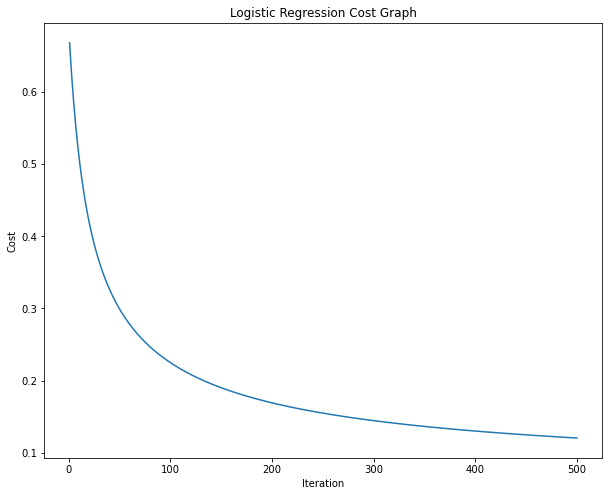

In [154]:
##With gradient descent and threshold as 0.6 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.973404255319149


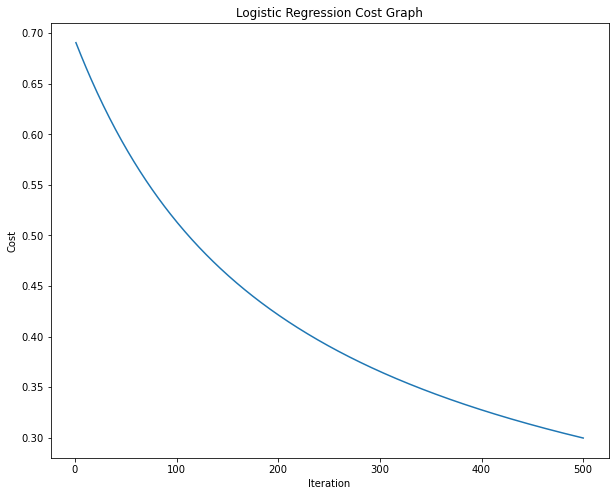

In [155]:
##With gradient descent and threshold as 0.6 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9893617021276596


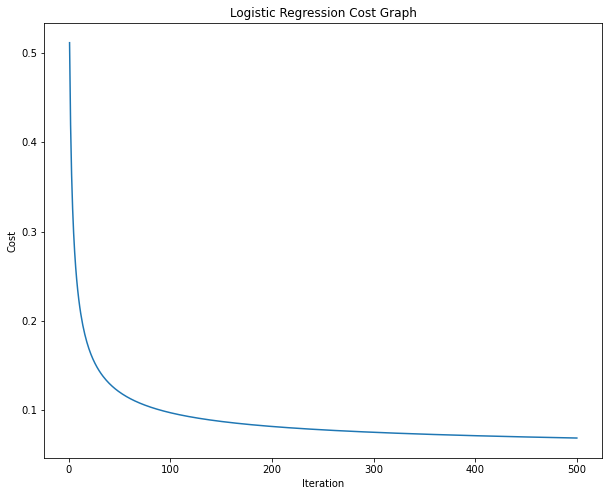

In [156]:
##With gradient descent and threshold as 0.7 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.973404255319149


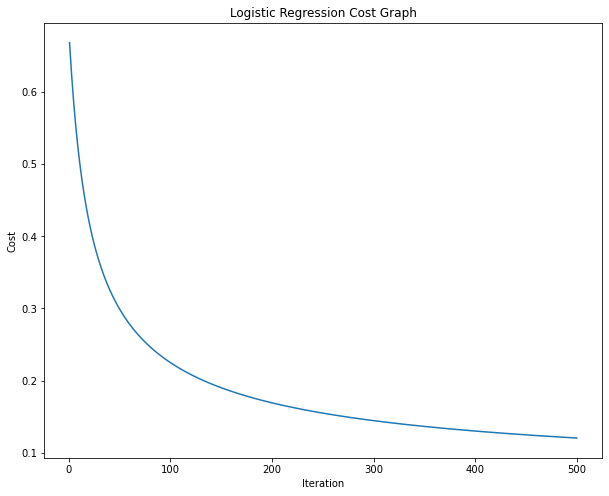

In [157]:
##With gradient descent and threshold as 0.7 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9574468085106383


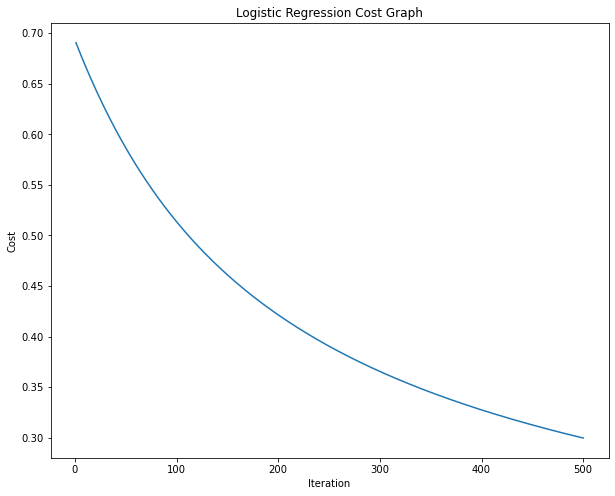

In [158]:
##With gradient descent and threshold as 0.7 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9574468085106383


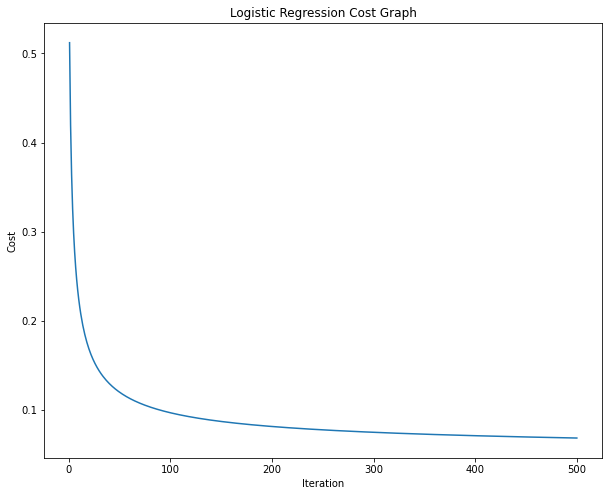

In [159]:
##With gradient descent and threshold as 0.4 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9468085106382979


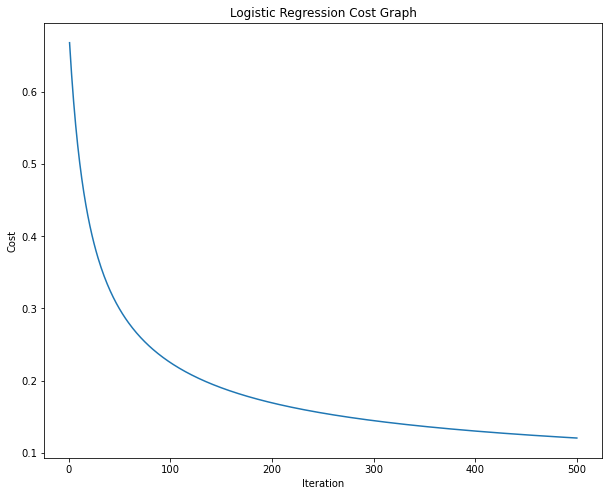

In [160]:
##With gradient descent and threshold as 0.4 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8776595744680851


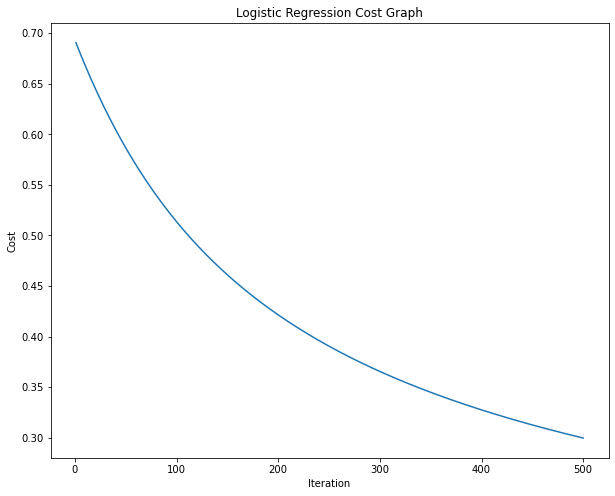

In [161]:
##With gradient descent and threshold as 0.4 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.9414893617021277


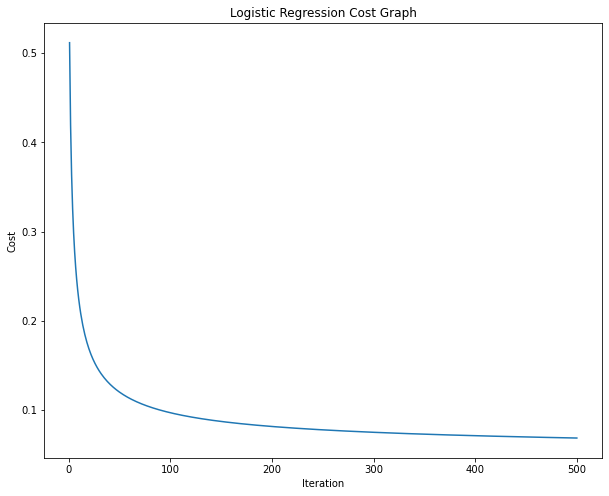

In [162]:
##With gradient descent and threshold as 0.3 and learning reate=0.01
model = LogisticRegressionMiniBatchGD(learning_rate=0.01, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.8882978723404256


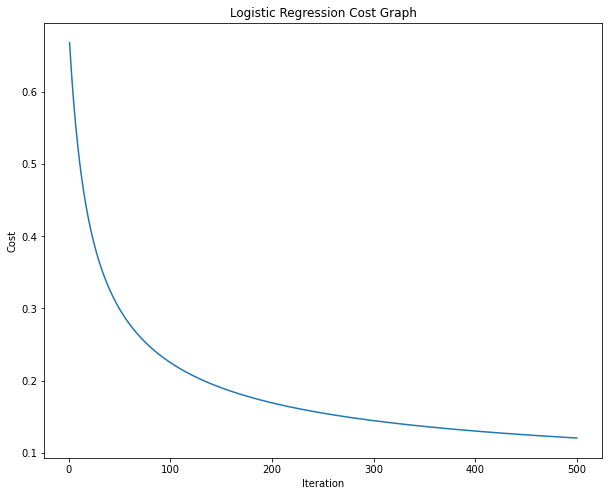

In [163]:
##With gradient descent and threshold as 0.3 and learning reate=0.001
model = LogisticRegressionMiniBatchGD(learning_rate=0.001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()

Accuracy: 0.6808510638297872


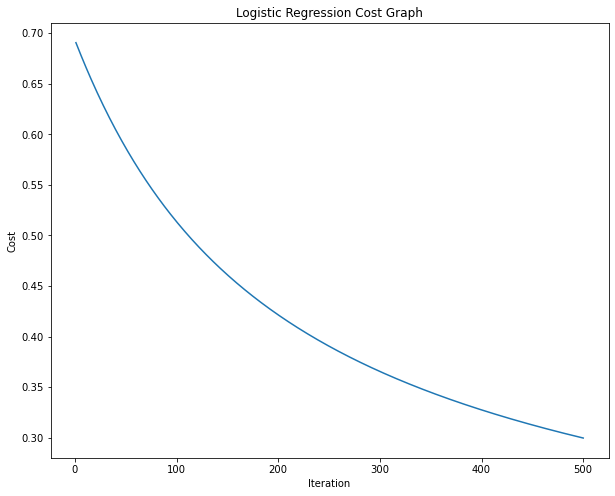

In [164]:
##With gradient descent and threshold as 0.3 and learning reate=0.0001
model = LogisticRegressionMiniBatchGD(learning_rate=0.0001, n_iters=500,threshold=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model.plot_cost()